In [64]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

## Анализ данных о погоде

In [2]:
path_to_weather_json = "weather.json"

In [11]:
with open(path_to_weather_json, 'r') as file:
    weather = json.load(file)

In [18]:
weather_hourly = weather['hourly']['data']

In [21]:
weather_hourly_df = pd.DataFrame(weather_hourly)
weather_hourly_df.head()

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType
0,1582095600,Clear,clear-night,0.0000,0.00,50.78,50.78,40.73,0.68,1018.6,4.55,5.51,307,0.06,0,10,339.7,NaN
1,1582099200,Clear,clear-night,0.0000,0.00,49.93,48.46,40.77,0.71,1018.7,4.48,5.15,200,0.10,0,10,339.0,NaN
2,1582102800,Clear,clear-night,0.0010,0.02,49.61,48.16,41.47,0.73,1018.9,4.36,5.69,238,0.12,0,10,338.0,rain
3,1582106400,Clear,clear-night,0.0003,0.01,49.13,47.61,42.03,0.76,1019.0,4.36,5.82,248,0.14,0,10,336.1,rain
4,1582110000,Clear,clear-night,0.0022,0.03,48.59,47.24,42.24,0.79,1019.1,4.00,5.45,250,0.15,0,10,333.7,rain


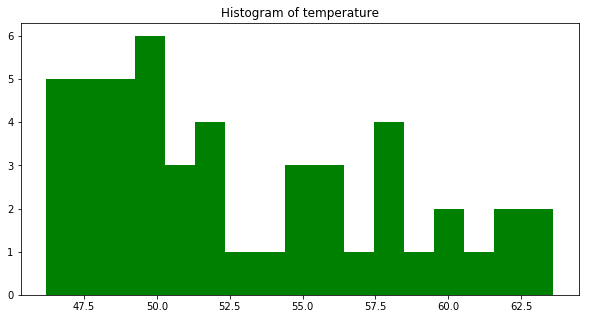

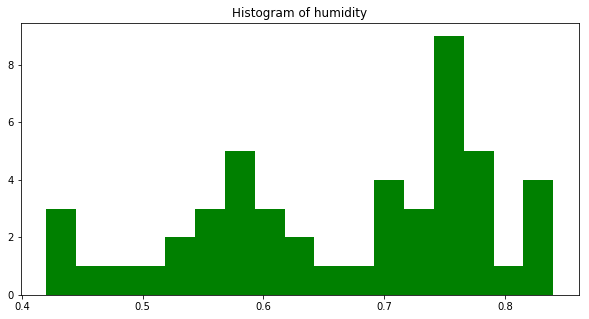

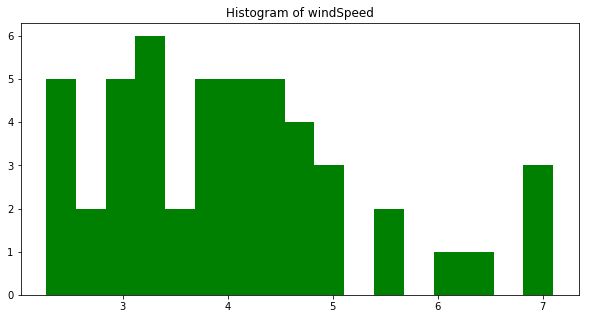

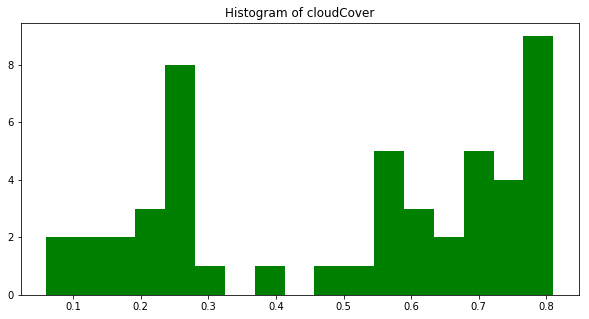

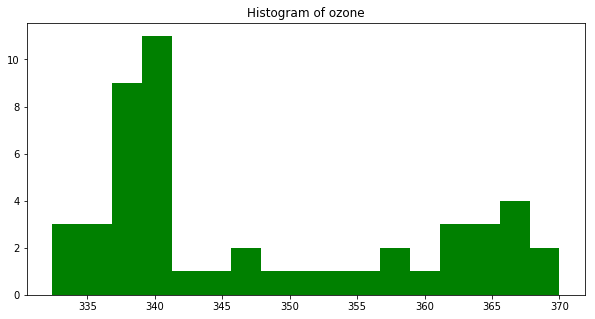

In [61]:
def create_and_save_hist(df, column_name):
    plt.figure(figsize=(10,5))
    plt.title('Histogram of %s' % column_name) 
    plt.hist(df['%s' % column_name], bins=17, color='g')
    plt.savefig('hists/%s_hist' % column_name)
    
needed_columns = ['temperature', 'humidity', 'windSpeed', 'cloudCover', 'ozone']
for column in needed_columns:
    create_and_save_hist(weather_hourly_df, column)

Распределение значений ни в одной из колонок не напоминает равномерное.

*Для задания 2 вытащу столбец windSpeed*

In [62]:
windSpeed_column = weather_hourly_df.loc[:, 'windSpeed']

In [68]:
with open('windSpeed_column.pickle', 'wb') as file:
    pickle.dump(list(windSpeed_column), file)

## Анализ 5 битов паролей

In [79]:
def str_to_bytes(string):
    return string.encode('utf-8')

def extract_first_5_bits_from_key(key, lower_bound, upper_bound):
    return int('{:08b}'.format(key[0])[lower_bound:upper_bound], 2)

In [80]:
lower_bound, upper_bound = 3, 8

In [72]:
path_to_passwords_json = "passwords.json"
with open(path_to_passwords_json, 'r') as file:
    passwords = json.load(file)

In [75]:
passwords_bytes = [str_to_bytes(password) for password in passwords]

In [83]:
first_bits_of_passwords = [extract_first_5_bits_from_key(password, lower_bound, upper_bound) 
                           for password in passwords_bytes]

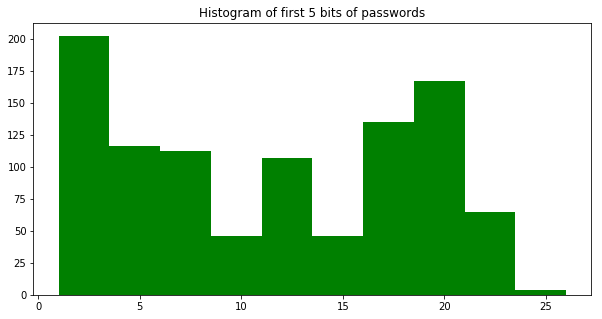

In [91]:
plt.figure(figsize=(10,5))
plt.title('Histogram of first 5 bits of passwords') 
plt.hist(first_bits_of_passwords, bins=10, color='g')
plt.savefig('hists/5_bits_passwords')

Распределение не похоже на равномерное.